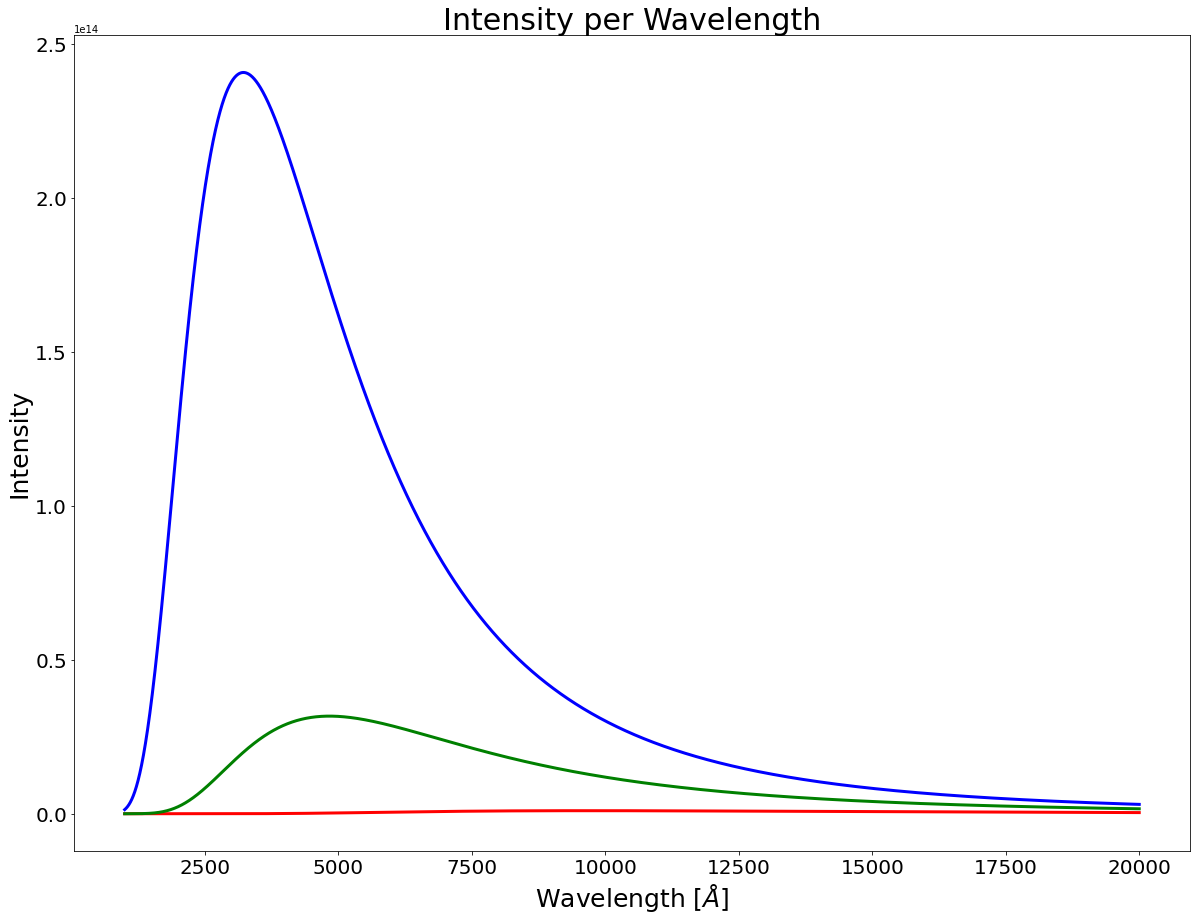

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def B_lambda(L,T):
    a = ((2.0*h*c**2)/(L**5.0))
    b = (np.exp((h*c)/(L*k*T))-1)
    return a*(1/b)


h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

T_eff1 = 3000 #K
T_eff2 = 6000 #K
T_eff3 = 9000 #K

lambda_array = np.arange(1000e-10, 20001e-10, 1e-10)  #cm

x = lambda_array
y_1 =  B_lambda(x,T_eff1) 
y_2 = B_lambda(x,T_eff2) 
y_3 = B_lambda(x,T_eff3) 

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.set_xlabel('Wavelength [$\AA$]', size = 25)
ax.set_ylabel('Intensity', size = 25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('Intensity per Wavelength', size = 30)

plt.plot(x*1e10,y_1, 'r', linewidth = 3) 
plt.plot(x*1e10,y_2, 'g', linewidth = 3) 
plt.plot(x*1e10,y_3, 'b', linewidth = 3) 

plt.show()    

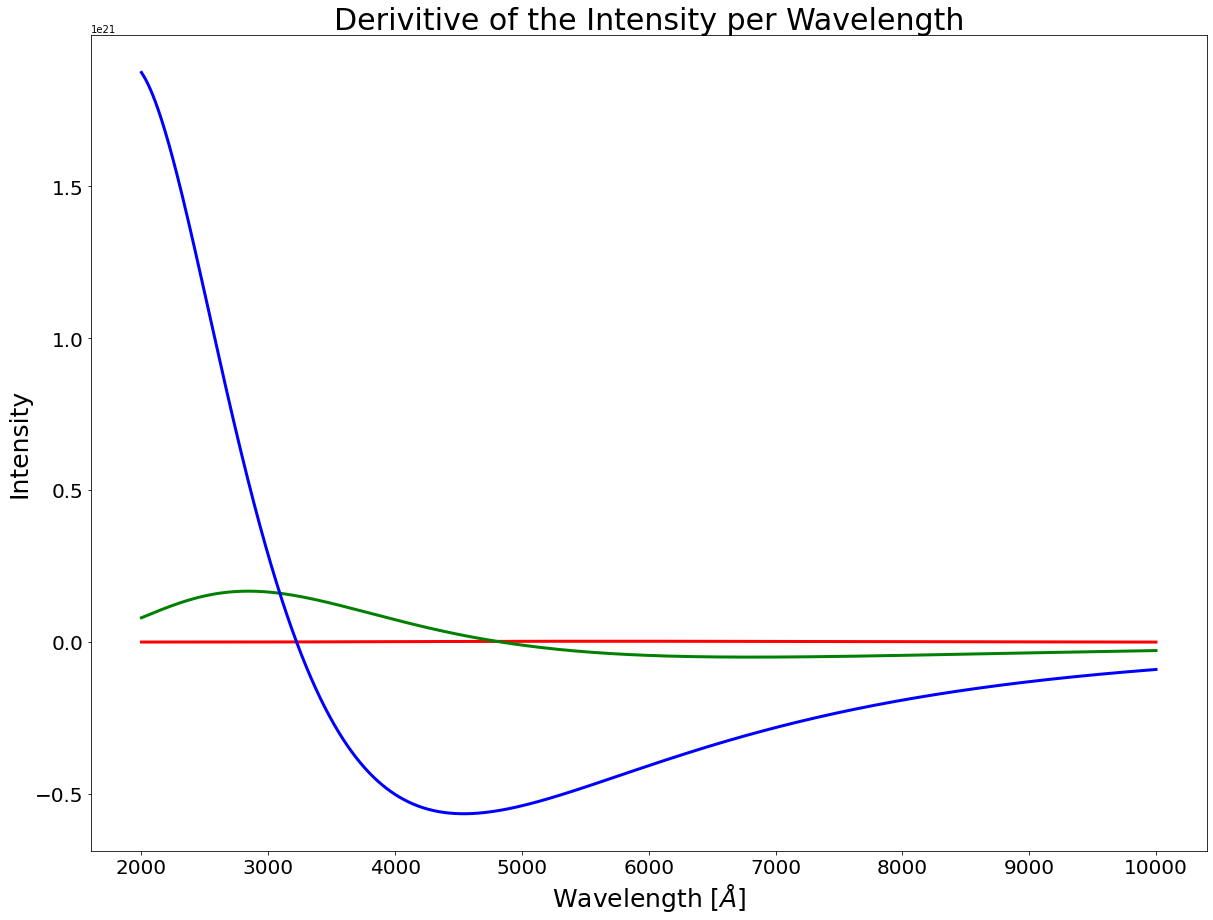

The peak wavelength for 3000 K is:  [9670.]
The peak wavelength for 6000 K is:  [4835.]
The peak wavelength for 9000 K is:  [3223.]


In [2]:
def dB_lambda(L,T):
    a = (-5)/((L**6)*(np.exp(h*c/(L*k*T))-1))
    b = ((h*c*np.exp(h*c/(L*k*T)))/(k*T*(L**7)*(np.exp(h*c/(L*k*T))-1)**2))
    return (2*h*c**2)*(a + b)

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23
 
dlambda_array = np.arange(2000e-10, 10001e-10, 1e-10)    

x = dlambda_array
y_1 =  dB_lambda(x,T_eff1) 
y_2 = dB_lambda(x,T_eff2) 
y_3 = dB_lambda(x,T_eff3) 

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.set_xlabel('Wavelength [$\AA$]', size = 25)
ax.set_ylabel('Intensity', size = 25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('Derivitive of the Intensity per Wavelength', size = 30)

plt.plot(x*1e10,y_1, 'r', linewidth = 3) 
plt.plot(x*1e10,y_2, 'g', linewidth = 3) 
plt.plot(x*1e10,y_3, 'b', linewidth = 3) 

plt.show()  


peak_1 = np.min(np.abs(y_1))
peak_2 = np.min(np.abs(y_2))
peak_3 = np.min(np.abs(y_3))

for i in y_1:
    if i == peak_1:
        I = np.where(y_1==peak_1)
        print ('The peak wavelength for 3000 K is: ', (x[I]*1e10))
        
for j in y_2:
    if j == peak_2:
        J = np.where(y_2 == peak_2)
        print('The peak wavelength for 6000 K is: ',x[J]*1e10)
        
for n in y_3:
    if n == peak_3:
        N = np.where(y_3 == peak_3)
        print('The peak wavelength for 9000 K is: ',x[N]*1e10)


LinregressResult(slope=29011153.846153848, intercept=-0.3461538461542659, rvalue=0.9999999991458, pvalue=2.631327566715184e-05, stderr=1199.1121267413246)


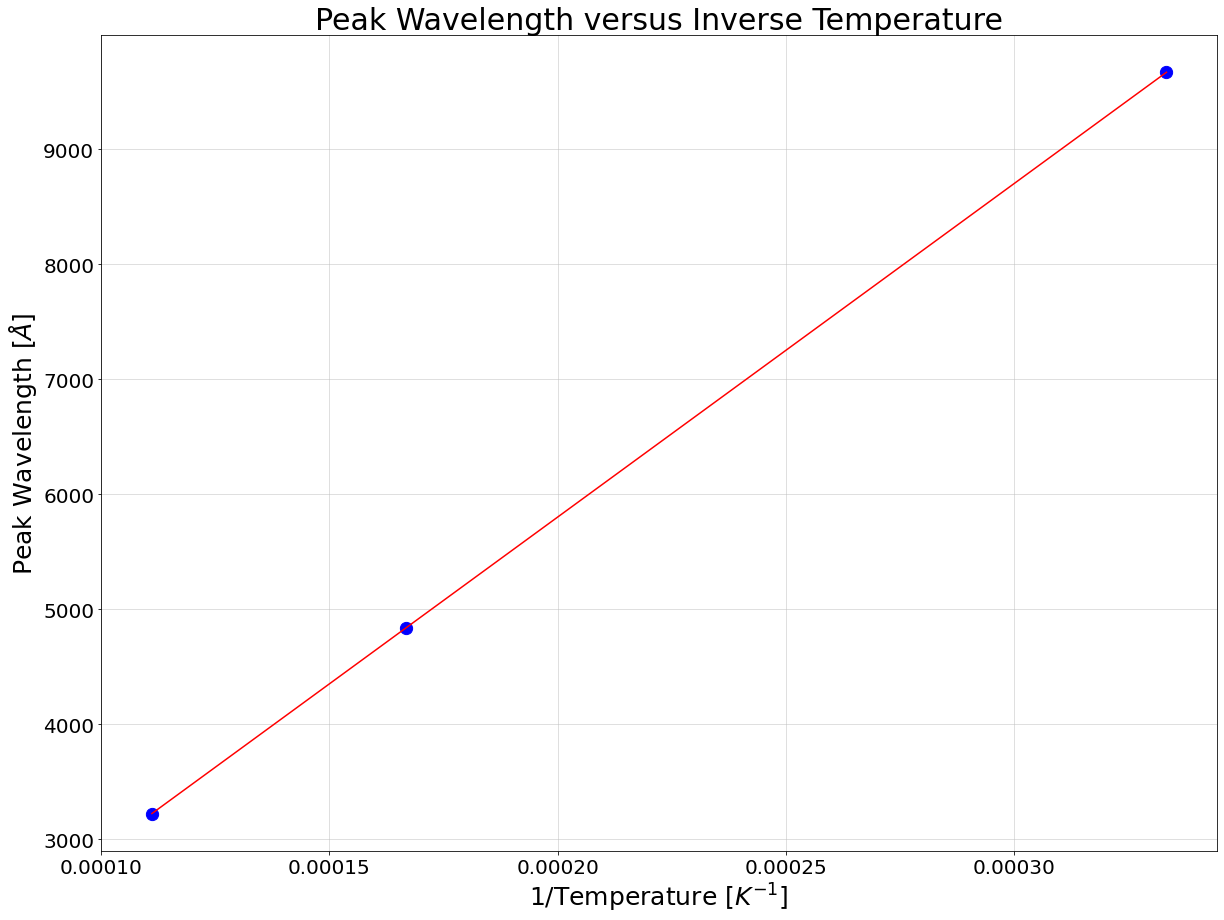

In [9]:
from scipy.stats import linregress

temps = np.array([1/T_eff1,1/T_eff2,1/T_eff3])
peaks = np.array([9670,4835,3223])

print(linregress(temps, peaks))

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(temps, peaks, s = 150, c='b')
plt.plot(temps,peaks,'r')
ax.set_xlabel('1/Temperature [$K^{-1}$]', size = 25)
ax.set_ylabel('Peak Wavelength [$\AA$]', size = 25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('Peak Wavelength versus Inverse Temperature', size = 30)
plt.grid(True, linewidth=0.5, color='silver', linestyle='-')

plt.show()



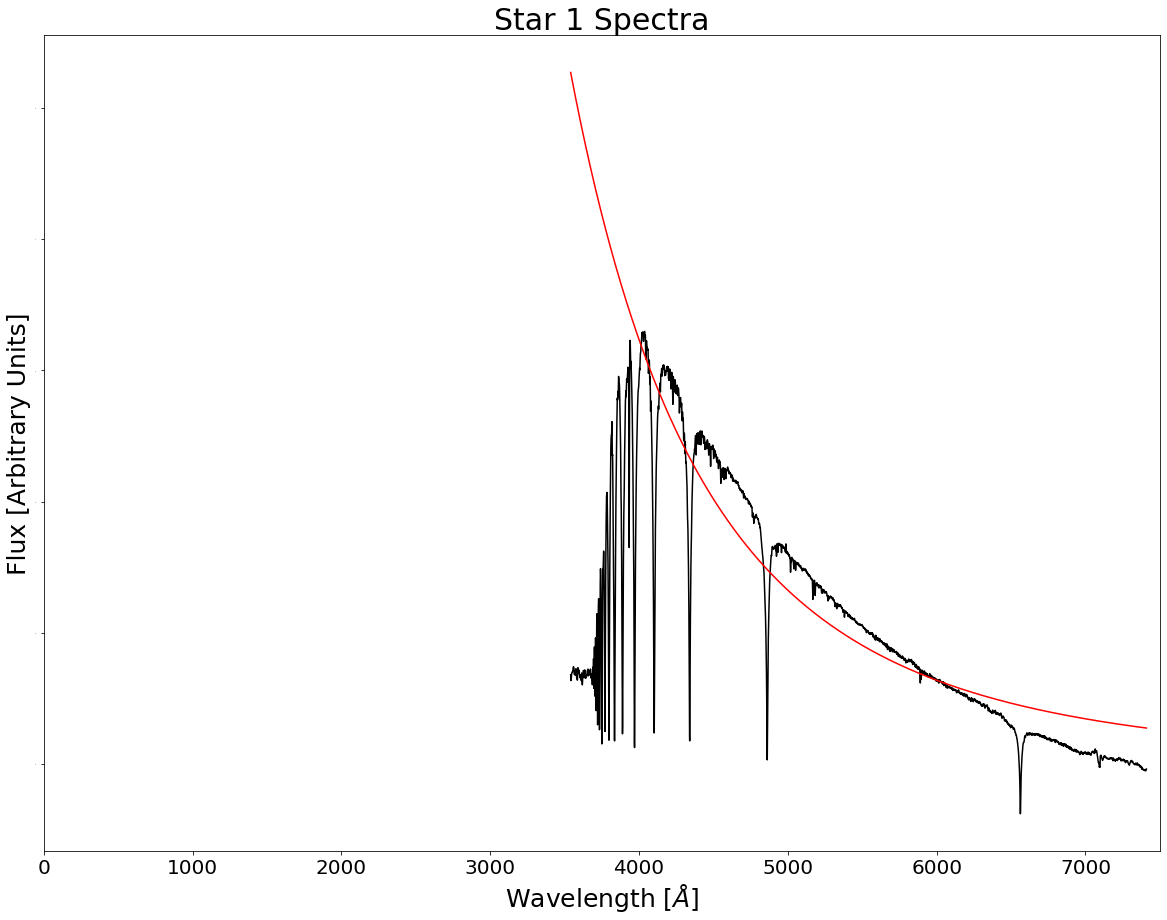

In [123]:
wavelength1, flux1 = np.loadtxt('star1.txt', unpack=True)

T_star1=50000

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

#xn = np.arange(1e-10, 20001e-10, 1e-10)

plt.plot(wavelength1,flux1,'k')
plt.plot(wavelength1,B_lambda(wavelength1*1e-6,T_star1)+0.5,'r')

ax.set_xlabel('Wavelength [$\AA$]', size = 25)
ax.set_ylabel('Flux [Arbitrary Units]', size = 25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=0)
ax.set_title('Star 1 Spectra', size = 30)

ax.set_xlim([0,7500])

plt.show()


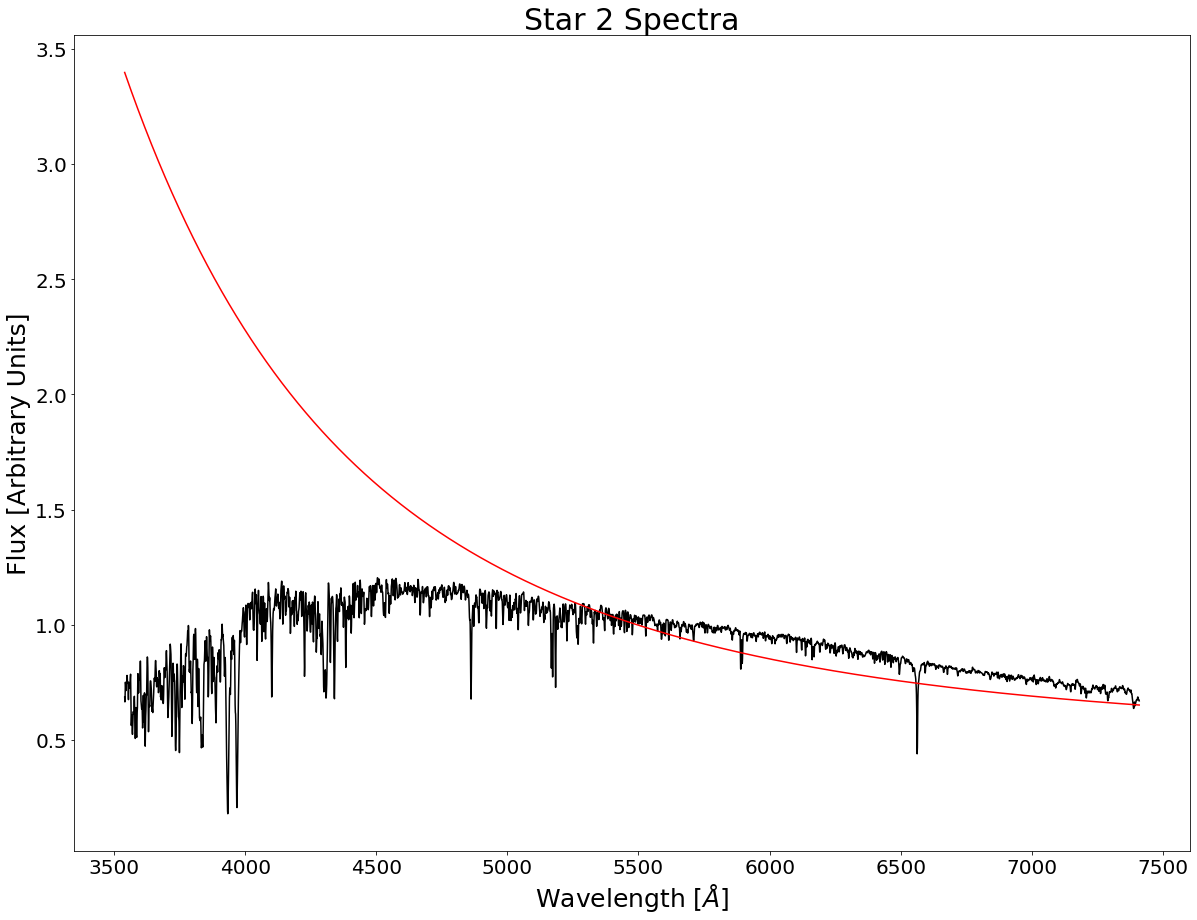

In [119]:
wavelength2, flux2 = np.loadtxt('star2.txt', unpack=True)

T_star2=5520

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

plt.plot(wavelength2,flux2,'k')
plt.plot(wavelength2,B_lambda(wavelength2*1e-6,T_star1)+.5,'r')

ax.set_xlabel('Wavelength [$\AA$]', size = 25)
ax.set_ylabel('Flux [Arbitrary Units]', size = 25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('Star 2 Spectra', size = 30)

plt.show()

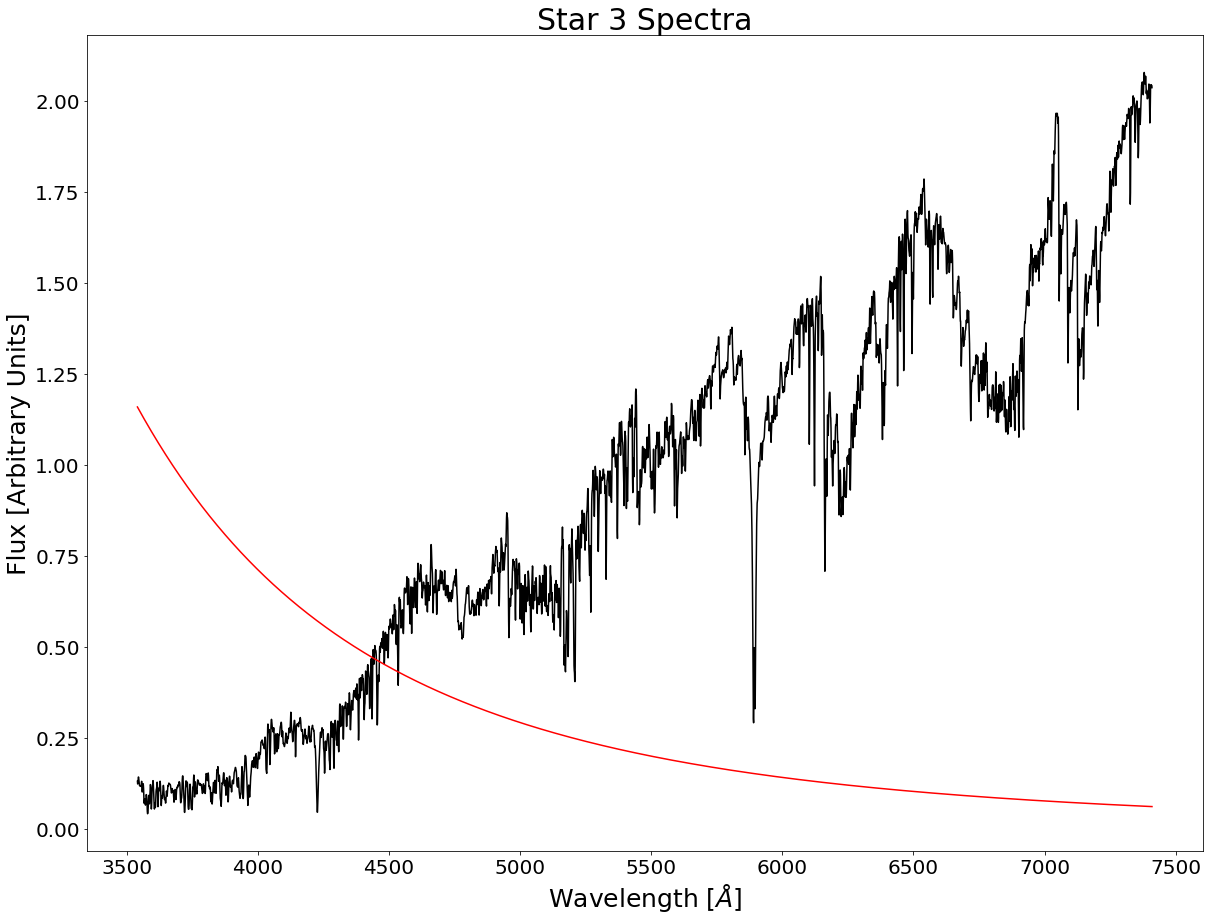

In [51]:
wavelength3, flux3 = np.loadtxt('star3.txt', unpack=True)

T_star3=5000

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

plt.plot(wavelength3,flux3,'k')
plt.plot(wavelength3,B_lambda(wavelength3*1e-6,T_star1),'r')

ax.set_xlabel('Wavelength [$\AA$]', size = 25)
ax.set_ylabel('Flux [Arbitrary Units]', size = 25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('Star 3 Spectra', size = 30)

plt.show()

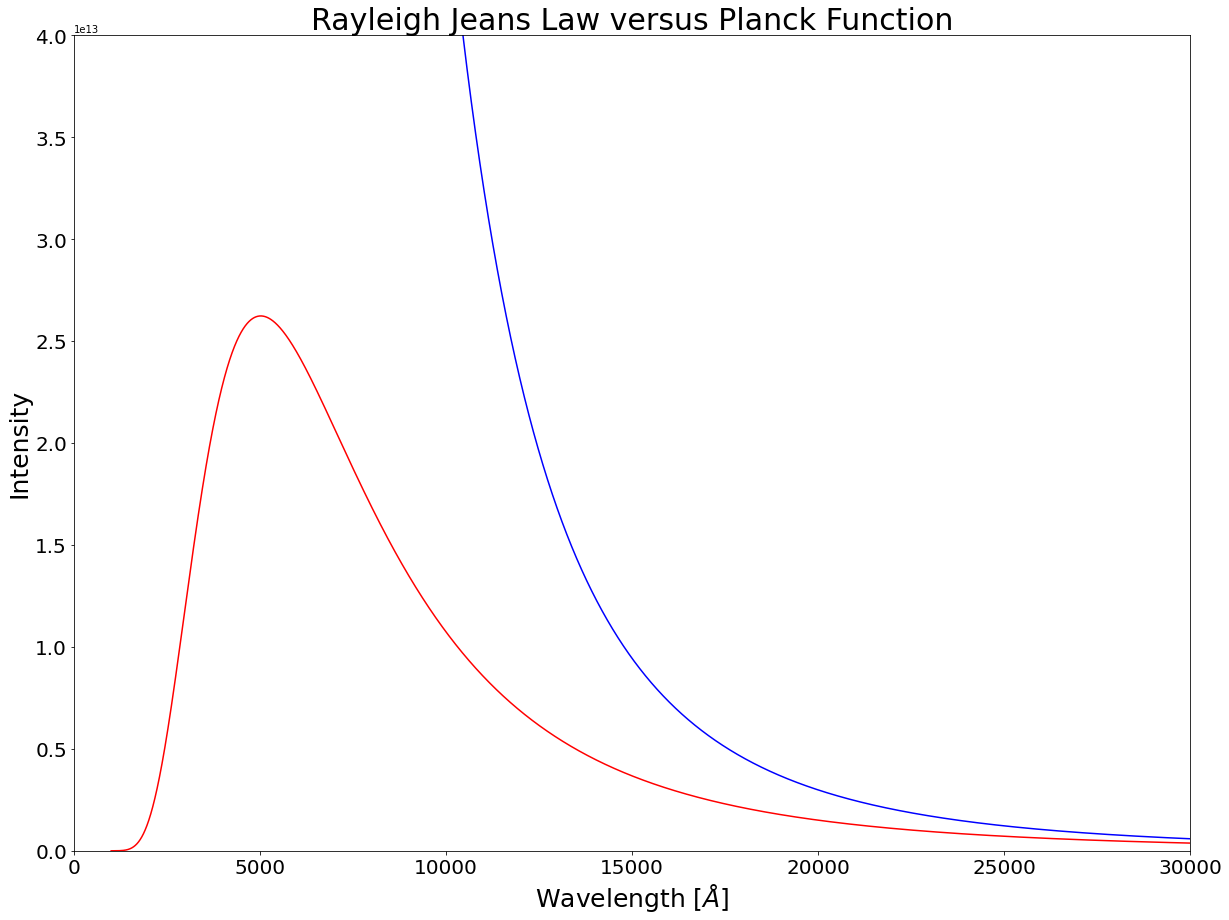

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
def RJ_law(L,T):
    return (2*c*k*T)/(L**4)

def B_lambda(L,T):
    a = ((2.0*h*c**2)/(L**5.0))
    b = (np.exp((h*c)/(L*k*T))-1)
    return a*(1/b)

T_odot = 5777 #K
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

x = (np.arange(1000e-10, 30001e-10, 1e-10))

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
plt.plot(x*1e10,RJ_law(x,T_odot),'b')
plt.plot(x*1e10,B_lambda(x, T_odot),'r')
ax.set_xlabel('Wavelength [$\AA$]', size = 25)
ax.set_ylabel('Intensity', size = 25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('Rayleigh Jeans Law versus Planck Function', size = 30)
ax.set_ylim([0,0.4e14])
ax.set_xlim([0,30000])

plt.show()
